# Setup

In [1]:
%matplotlib inline
from pylab import *
import math
import numpy as np

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import decay_properties as decay
reload(decay)

import trigger_properties as RF
reload(RF)

<module 'trigger_properties' from 'trigger_properties.pyc'>

## Creation of Graph with Successive Effective Area Refinement

In [2]:
phi_src = radians(180)
h = 35.5 #km
R = 6356. # km
ice =4
theta_view = radians(1) #degrees
N=50000000 # number of samples 1000000
E_nu = 19 #log energy in eV of incident neutrino 
E_cut = 14
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1
Epk_to_pk_threshold = 284e-6

In [3]:
A_g = []
A_exit=[]
A_exit_decay=[]
#A_exit_energy_decay=[]
A_rf = []

dist_med=[]
eng_med=[]

    
start = 50 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=80 # divisions indeclination used to generate plot
#x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)  
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    
    decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,0)
    
    A_1,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_shower_eng,ret_types, ret_p_exit, A0, N0 = decay1.degree_eff_area()

    
    A_2 = A0 *1./float(N0) *  np.sum(ret_p_exit * ret_e_dot * (ret_exit_decay < ret_exit_obs) * (ret_tau_energy >0) * (ret_e_dot>0.) ) 
        
    A_trigger =0
    
    if len(ret_e_dot) != 0:
        trigger_result = RF.event_detection(A_2, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold, A0,N0)
        A_trigger = trigger_result.RF_eff_area()

    
    A_g.append(A_deg)
    A_exit.append(A_1)
    A_exit_decay.append(A_2)
    A_rf.append(A_trigger)
    print round(degrees(theta_src),4)


50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5


Tau_Exit_Simulator_2.py:35: RuntimeWarning: invalid value encountered in double_scalars
  m = (y2-y1)/(x2-x1)


83.0
83.5


detectorgeometry_trap.py:35: RuntimeWarning: invalid value encountered in arcsin
  arg = np.arcsin((self.R+self.h) * np.sin(nadir) / self.R)


84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5


0.0 193.7264960731789


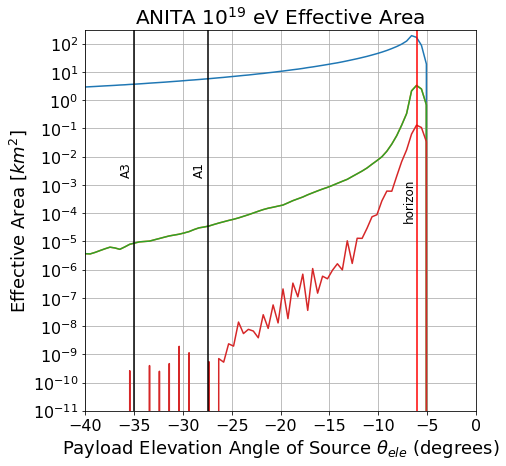

In [5]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(yscale='log')
x2 = np.linspace(-(90-start),-(90-end),steps)
x_full = x2 #np.concatenate((x1,x2))

ax.plot(x_full, A_g)
ax.plot(x_full, A_exit)
ax.plot(x_full, A_exit_decay)
ax.plot(x_full, A_rf)

#plt.fill_between(x2, sky_maps[0],sky_maps[1],color='tab:gray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-40,0)  
plt.ylim(10**-11,3*10**2)  
# legend = ax.legend([r'$\langle A \rangle_g$', 
#                     r'$\langle A \rangle_g \cdot P_{exit}$', 
#                     r'$\langle A \rangle_g \cdot P_{exit} \cdot P_{decay}$',
#                    r'$\langle A \rangle_g \cdot P_{exit} \cdot P_{decay} \cdot P_{trigger} $'],
#                    fontsize=14, bbox_to_anchor=(0.8, -0.15)) #
# plt.setp(legend.get_title(),fontsize='x-large')

plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel("Effective Area " +r'$[km^2]$', fontsize=18)
plt.title("ANITA "+r'$10^{19}$'+" eV Effective Area", fontsize=20)


plt.text(-7.5,8*10**-4,'horizon',rotation=90,fontsize=12)
plt.text(-29,3*10**-3,'A1',rotation=90,fontsize=12)
plt.text(-36.5,3*10**-3,'A3',rotation=90,fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

y_min =min(A_g)
y_max = max(A_g)
print y_min, y_max
y_ticks = [10**x for x in range(int(round(math.log10(10**-11))),int(round(math.log10(y_max)))+1)]
plt.yticks(y_ticks)
ax.grid(True,which='both')
#plt.semilogy()
plt.show()

## Plotting the difference in trigger probability for tau enery or shower energy

In [ ]:
A_rf_t = []
A_rf_s = []

N=10000000

start = 50 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=80 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)  
    print theta_src
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
 
    decay_prop = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)

    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_shower_eng,ret_types, ret_p_exit, A0, N0 = decay_prop.degree_eff_area()
    
    A_trigger_t =0
    A_trigger_s =0
    if len(ret_e_dot) != 0:
        trigger_result_t = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_tau_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold1, A0,N0)
        A_trigger_t = trigger_result_t.RF_eff_area()
        
        trigger_result_s = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold1, A0,N0)
        A_trigger_s = trigger_result_s.RF_eff_area()

    A_rf_t.append(A_trigger_t)
    A_rf_s.append(A_trigger_s)
    print round(degrees(theta_src),4)

## Plotting the two thresholds

In [ ]:
#Graph for different cutoffs
Epk_to_pk_threshold3 = 248e-6
Epk_to_pk_threshold1 = 446e-6

A_rf_1 = []
A_rf_3 = []

N=10000000

start = 50 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=160 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,steps):
    theta_src = radians(start+(end-start)*float(j)/steps)  
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
 
    decay_prop = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)

    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_shower_eng,ret_types, ret_p_exit, A0, N0 = decay_prop.degree_eff_area()
    A_trigger1 =0
    A_trigger3 =0
    if len(ret_e_dot) != 0:
        trigger_result1 = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold1, A0,N0)
        A_trigger1 = trigger_result1.RF_eff_area()
        
        trigger_result3 = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold3, A0,N0)
        A_trigger3 = trigger_result3.RF_eff_area()

    A_rf_1.append(A_trigger1)
    A_rf_3.append(A_trigger3)
    print round(degrees(theta_src),4)

In [ ]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x_full = x2 #np.concatenate((x1,x2))

ax.plot(x_full, A_rf_1)
ax.plot(x_full, A_rf_3)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.text(-5.5,10**-4,'horizon',rotation=90,fontsize=12)
plt.text(-29,10**-4,'A1',rotation=90,fontsize=12)
plt.text(-36.5,10**-4,'A3',rotation=90,fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
legend = ax.legend(["ANITA 1","ANITA 3"], fontsize=14,bbox_to_anchor=(0.8, -0.15))
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()

## Plotting the energy fraction

In [ ]:
N=5000000
eng_frac=[]
eng_frac_hi=[]
eng_frac_low=[]

start = 50 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=80 # divisions indeclination used to generate plot
x2 = np.linspace(-(90-start),-(90-end),steps)

for j in range(0,1):#steps
    theta_src = radians(start+(end-start)*float(j)/steps)
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    
    decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)
    
    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_eng_shower,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()
    
    if len(ret_exit_decay)!=0:
        energy_fractions = (10**ret_eng_shower)/(10**ret_tau_energy)
        
        eng_frac.append(median(energy_fractions))
        eng_frac_hi.append(max(energy_fractions))
        eng_frac_low.append(min(energy_fractions))
    else:
        eng_frac.append(0)
        eng_frac_hi.append(0)
        eng_frac_low.append(0)
    print degrees(theta_src)



In [ ]:
print median(energy_fractions)

In [ ]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.xlabel('Energy Fraction', fontsize=14)
plt.ylabel('Count', fontsize=14)
#plt.xlim(0,17.5)
#plt.ylim(0.5,10**5)
min_bin = min(energy_fractions)
max_bin = max(energy_fractions)
n, bins, patches = plt.hist(x=energy_fractions, bins=arange(min_bin,max_bin,0.1), color='#0504aa',
                   rwidth=0.85)

plt.title("Tau Shower Energy Fraction", fontsize=16)
#ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{:.3g}'))
#plt.figtext(.5,-0.1,"Voltage Cutoff "+'{:.3g}'.format(cutoff), fontsize=12, ha='center')
#plt.figtext(.5,-0.1,"Voltage Cutoff "+str(round(cutoff,6)), fontsize=12, ha='center')
#plt.text(0.02, 0.02, "View Angle Cut: "+str(threshhold), fontsize=14, transform=plt.gcf().transFigure)


In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.plot(x2, eng_frac)


#plt.fill_between(x2, eng_frac_low,eng_frac_hi,color='lightgray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-40,0)  
#plt.ylim(10**14,10**18)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel("Median Air Shower Energy Fraction", fontsize=18)
plt.title("ANITA "+r'$10^{18}$'+" eV "+" Air Shower Energy", fontsize=20)

plt.text(-7.5,0.5,'horizon',rotation=90,fontsize=12)
plt.text(-29,0.5,'A1',rotation=90,fontsize=12)
plt.text(-36.5,0.5,'A3',rotation=90,fontsize=12)
horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')

ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

# y_min =min(eng_med_log)
# y_max = max(eng_med_log)
# print y_min, y_max
# y_ticks = [10**x for x in range(int(round(math.log10(10**0))),int(round(math.log10(y_max)))+1)]
# plt.yticks(y_ticks)
ax.grid(True,which='both')
#plt.semilogy()
plt.show()

In [ ]:
4200* 100**2 * 20 * 24*3600

In [ ]:
theta_src = np.radians(90-27.4)
E_nu = 18
N = 100000000
Epk_to_pk_threshold3 = 248e-6
Epk_to_pk_threshold1 = 446e-6
view_angle = radians(1)

geom_area = geom_trap.Area(theta_src, h,R,view_angle, N)
A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()

decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                         norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)
A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_shower_eng,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()

trigger_result_t = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                    ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                    theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                    ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold1, A0,N0)

A = trigger_result_t.RF_eff_area()

print A